In [1]:
import pandas as pd
import numpy as np

from sklearn.covariance import EllipticEnvelope
outliers_fraction = 0.01

In [2]:
def read_data(filename):
    df = pd.read_csv(filename,
                     parse_dates=['Date-Time'])
    df['Date-Time'] = df['Date-Time'].dt.tz_localize(None)
    df = df.set_index('Date-Time')
    df = df.drop(columns=['Unnamed: 0'])
    return df

In [3]:
DEVICE_NAME = 'label_sample_device_7B_16'

In [4]:
device = read_data(DEVICE_NAME + '.csv')

In [5]:
def gaussian_distribution(df):
    '''Method for deleting anomalies'''
    
    envelope =  EllipticEnvelope(contamination = outliers_fraction) 
    data = df.copy()
    for col in data.columns:
        
        X_train = data[col].values.reshape(-1,1)
        envelope.fit(X_train)
        
        df = pd.DataFrame(data[col])
        df['deviation'] = envelope.decision_function(X_train)
        df['anomaly'] = envelope.predict(X_train)
        df = df.reset_index()
        
        # Outliers marked as '-1', than we replace them with median of all samples with mark '1'
        df.loc[df.anomaly == -1, col] = df.loc[df.anomaly == 1, col].median()
        

        data[col] = df[col].values
        
    return data

In [7]:
device_wo_anomalies = gaussian_distribution(device)
device_wo_anomalies.columns = [i + '_anomaly_cleaned' for i in device_wo_anomalies.columns]
# device_wo_anomalies.reset_index().to_csv(DEVICE_NAME + '_wo_anomaly.csv', index=False)

<AxesSubplot:xlabel='Date-Time'>

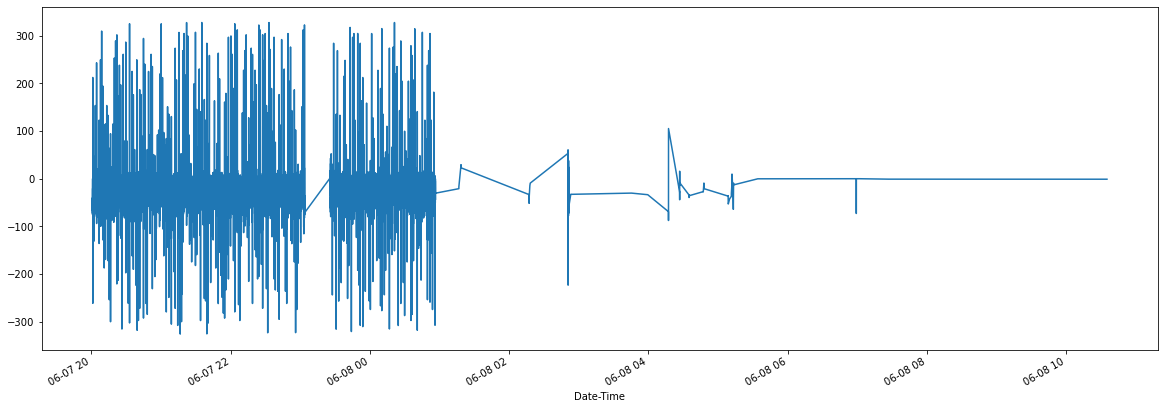

In [15]:
device['pitch'].plot(figsize=(20,7))

<AxesSubplot:xlabel='Date-Time'>

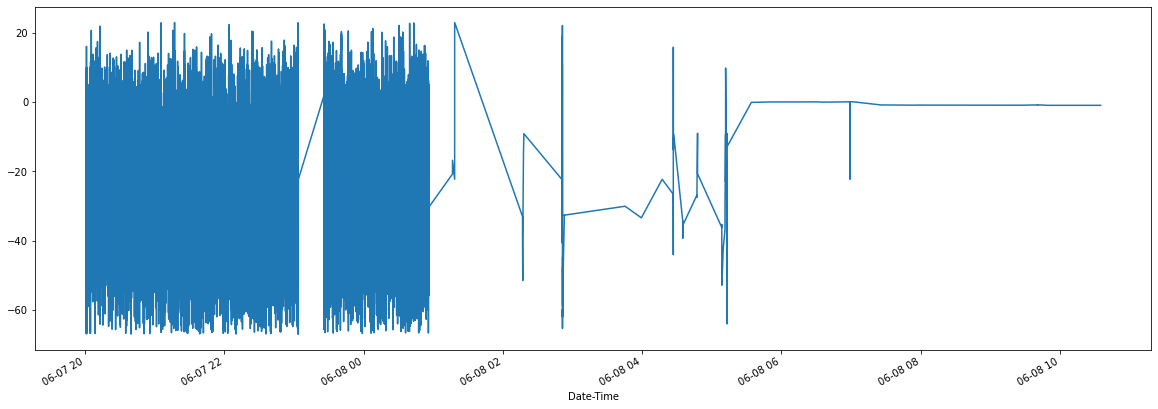

In [16]:
device_wo_anomalies['pitch_anomaly_cleaned'].plot(figsize=(20,7))